In [1]:
!pip install mlxtend

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

#Import data
df = pd.read_csv('/content/drive/My Drive/BADS7105 CRM/Prod_Rec.csv',encoding = 'utf8')
df.head(5)

Timestamp Running shoes  ...      Cactus    ROV Skin
0  10/28/2021 14:05       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ
1  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ     เคยซื้อ
2  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ
3  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ
4  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ

[5 rows x 24 columns]

In [5]:
#Check for missing data

missing = df.isnull().sum()
print(missing)

Timestamp                0
Running shoes            0
Crispy Veggie            0
Training Courses         0
Nintendo Switch          0
Bitcoin                  0
Mechanical Keyboard      0
Dyson                    0
Ipad Case                0
Level-ajustable Table    0
Pimripie's Products      0
Bluetooth Earpods        0
Starbucks Cup            0
Seat Cushion             0
Coffee Machine           0
Air Ticket               0
Ebook                    0
Refrigerator             0
Film Camera              0
Musical Instruments      0
Whey Protein             0
Sacred object            0
Cactus                   0
ROV Skin                 0
dtype: int64


In [6]:
#Convert the cateforical data to 0 = ไม่เคยซื้อ , 1 = เคยซื้อ

def int_convert(x):
    if x == 'ไม่เคยซื้อ':
        return 0
    if x == 'เคยซื้อ':
        return 1
df = df.applymap(int_convert)

In [8]:
df.head()

Timestamp  Running shoes  Crispy Veggie  ...  Sacred object  Cactus  ROV Skin
0      None              1              1  ...              1       0         0
1      None              1              0  ...              0       0         1
2      None              1              0  ...              0       0         0
3      None              1              0  ...              0       0         0
4      None              1              1  ...              0       0         0

[5 rows x 24 columns]

In [15]:
#Drop the incompleted column 
try:
  df.drop('Refrigerator', inplace=True, axis=1)
except:
  pass

try:
  df.drop('Timestamp', inplace=True, axis=1)
except:
  pass  

In [16]:
df.head()

Running shoes  Crispy Veggie  ...  Cactus  ROV Skin
0              1              1  ...       0         0
1              1              0  ...       0         1
2              1              0  ...       0         0
3              1              0  ...       0         0
4              1              1  ...       0         0

[5 rows x 22 columns]

In [17]:
#create apriori model and finetune minimum support value

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

In [23]:
#create associate rule

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         926 non-null    object 
 1   consequents         926 non-null    object 
 2   antecedent support  926 non-null    float64
 3   consequent support  926 non-null    float64
 4   support             926 non-null    float64
 5   confidence          926 non-null    float64
 6   lift                926 non-null    float64
 7   leverage            926 non-null    float64
 8   conviction          926 non-null    float64
dtypes: float64(7), object(2)
memory usage: 65.2+ KB


In [24]:
rules.head()

antecedents      consequents  ...  leverage  conviction
0      (Crispy Veggie)  (Running shoes)  ...  0.011891         inf
1      (Running shoes)  (Crispy Veggie)  ...  0.011891    1.019157
2      (Running shoes)        (Bitcoin)  ...  0.015458    1.029885
3            (Bitcoin)  (Running shoes)  ...  0.015458         inf
4  (Bluetooth Earpods)  (Running shoes)  ...  0.026159         inf

[5 rows x 9 columns]

In [25]:
#Filter the rule with lift >=1 and confidence >=0.5

rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

antecedents  ... conviction
0                      (Crispy Veggie)  ...        inf
3                            (Bitcoin)  ...        inf
4                  (Bluetooth Earpods)  ...        inf
5                      (Running shoes)  ...   1.126437
6                              (Ebook)  ...        inf
..                                 ...  ...        ...
915          (Seat Cushion, Ipad Case)  ...   1.339901
917      (Seat Cushion, Running shoes)  ...   1.465517
919   (Training Courses, Seat Cushion)  ...   1.261084
920  (Seat Cushion, Bluetooth Earpods)  ...   1.655172
925                     (Seat Cushion)  ...   1.339901

[725 rows x 9 columns]

In [26]:
#Top 20 Interesting recommendation
rules_Top20 = rules.sort_values(["lift"], ascending = (False))

In [27]:
rules_Top20.head(20)

antecedents  ... conviction
792          (Bluetooth Earpods, Ebook, Running shoes)  ...   1.905172
572                               (Ipad Case, Bitcoin)  ...   2.206897
796                (Running shoes, Ipad Case, Bitcoin)  ...   2.206897
801                         (Bluetooth Earpods, Ebook)  ...   1.905172
805                               (Ipad Case, Bitcoin)  ...   2.206897
569                         (Bluetooth Earpods, Ebook)  ...   1.905172
577                                          (Bitcoin)  ...   1.793103
399                           (Running shoes, Bitcoin)  ...   1.793103
199                                          (Bitcoin)  ...   1.793103
790              (Bluetooth Earpods, Ebook, Ipad Case)  ...   1.793103
564              (Ebook, Bluetooth Earpods, Ipad Case)  ...   1.793103
403                                          (Bitcoin)  ...   1.793103
813                                          (Bitcoin)  ...   1.793103
807                           (Running shoes, Bitcoin)  ...   1.793103
390          (Bluetooth Earpods, Ebook, Running shoes)  ...   1.793103
194                         (Bluetooth Earpods, Ebook)  ...   1.793103
394                         (Bluetooth Earpods, Ebook)  ...   1.793103
784  (Running shoes, Bluetooth Earpods, Ebook, Ipad...  ...   1.793103
894       (Training Courses, Bluetooth Earpods, Ebook)  ...   1.931034
899           (Seat Cushion, Running shoes, Ipad Case)  ...   1.465517

[20 rows x 9 columns]

In [28]:
rules_Top20[rules_Top20['consequents'].str.len()==1].head(20)


antecedents  ... conviction
564              (Ebook, Bluetooth Earpods, Ipad Case)  ...   1.793103
390          (Bluetooth Earpods, Ebook, Running shoes)  ...   1.793103
194                         (Bluetooth Earpods, Ebook)  ...   1.793103
784  (Running shoes, Bluetooth Earpods, Ebook, Ipad...  ...   1.793103
758  (Training Courses, Bluetooth Earpods, Ebook, R...  ...   1.793103
553       (Training Courses, Bluetooth Earpods, Ebook)  ...   1.793103
840  (Training Courses, Bluetooth Earpods, Ebook, I...  ...   1.793103
868  (Ebook, Ipad Case, Running shoes, Training Cou...  ...   1.793103
182                     (Bluetooth Earpods, Ipad Case)  ...   1.379310
362      (Running shoes, Bluetooth Earpods, Ipad Case)  ...   1.379310
528  (Training Courses, Ipad Case, Musical Instrume...  ...   1.681034
173            (Training Courses, Musical Instruments)  ...   1.681034
785         (Running shoes, Ebook, Ipad Case, Bitcoin)  ...        inf
567                        (Ebook, Ipad Case, Bitcoin)  ...        inf
365                (Running shoes, Ipad Case, Bitcoin)  ...        inf
591  (Training Courses, Running shoes, Ipad Case, B...  ...        inf
480             (Training Courses, Ipad Case, Bitcoin)  ...        inf
184                               (Ipad Case, Bitcoin)  ...        inf
702  (Training Courses, Running shoes, Ipad Case, M...  ...   1.568966
339  (Training Courses, Running shoes, Musical Inst...  ...   1.568966

[20 rows x 9 columns]

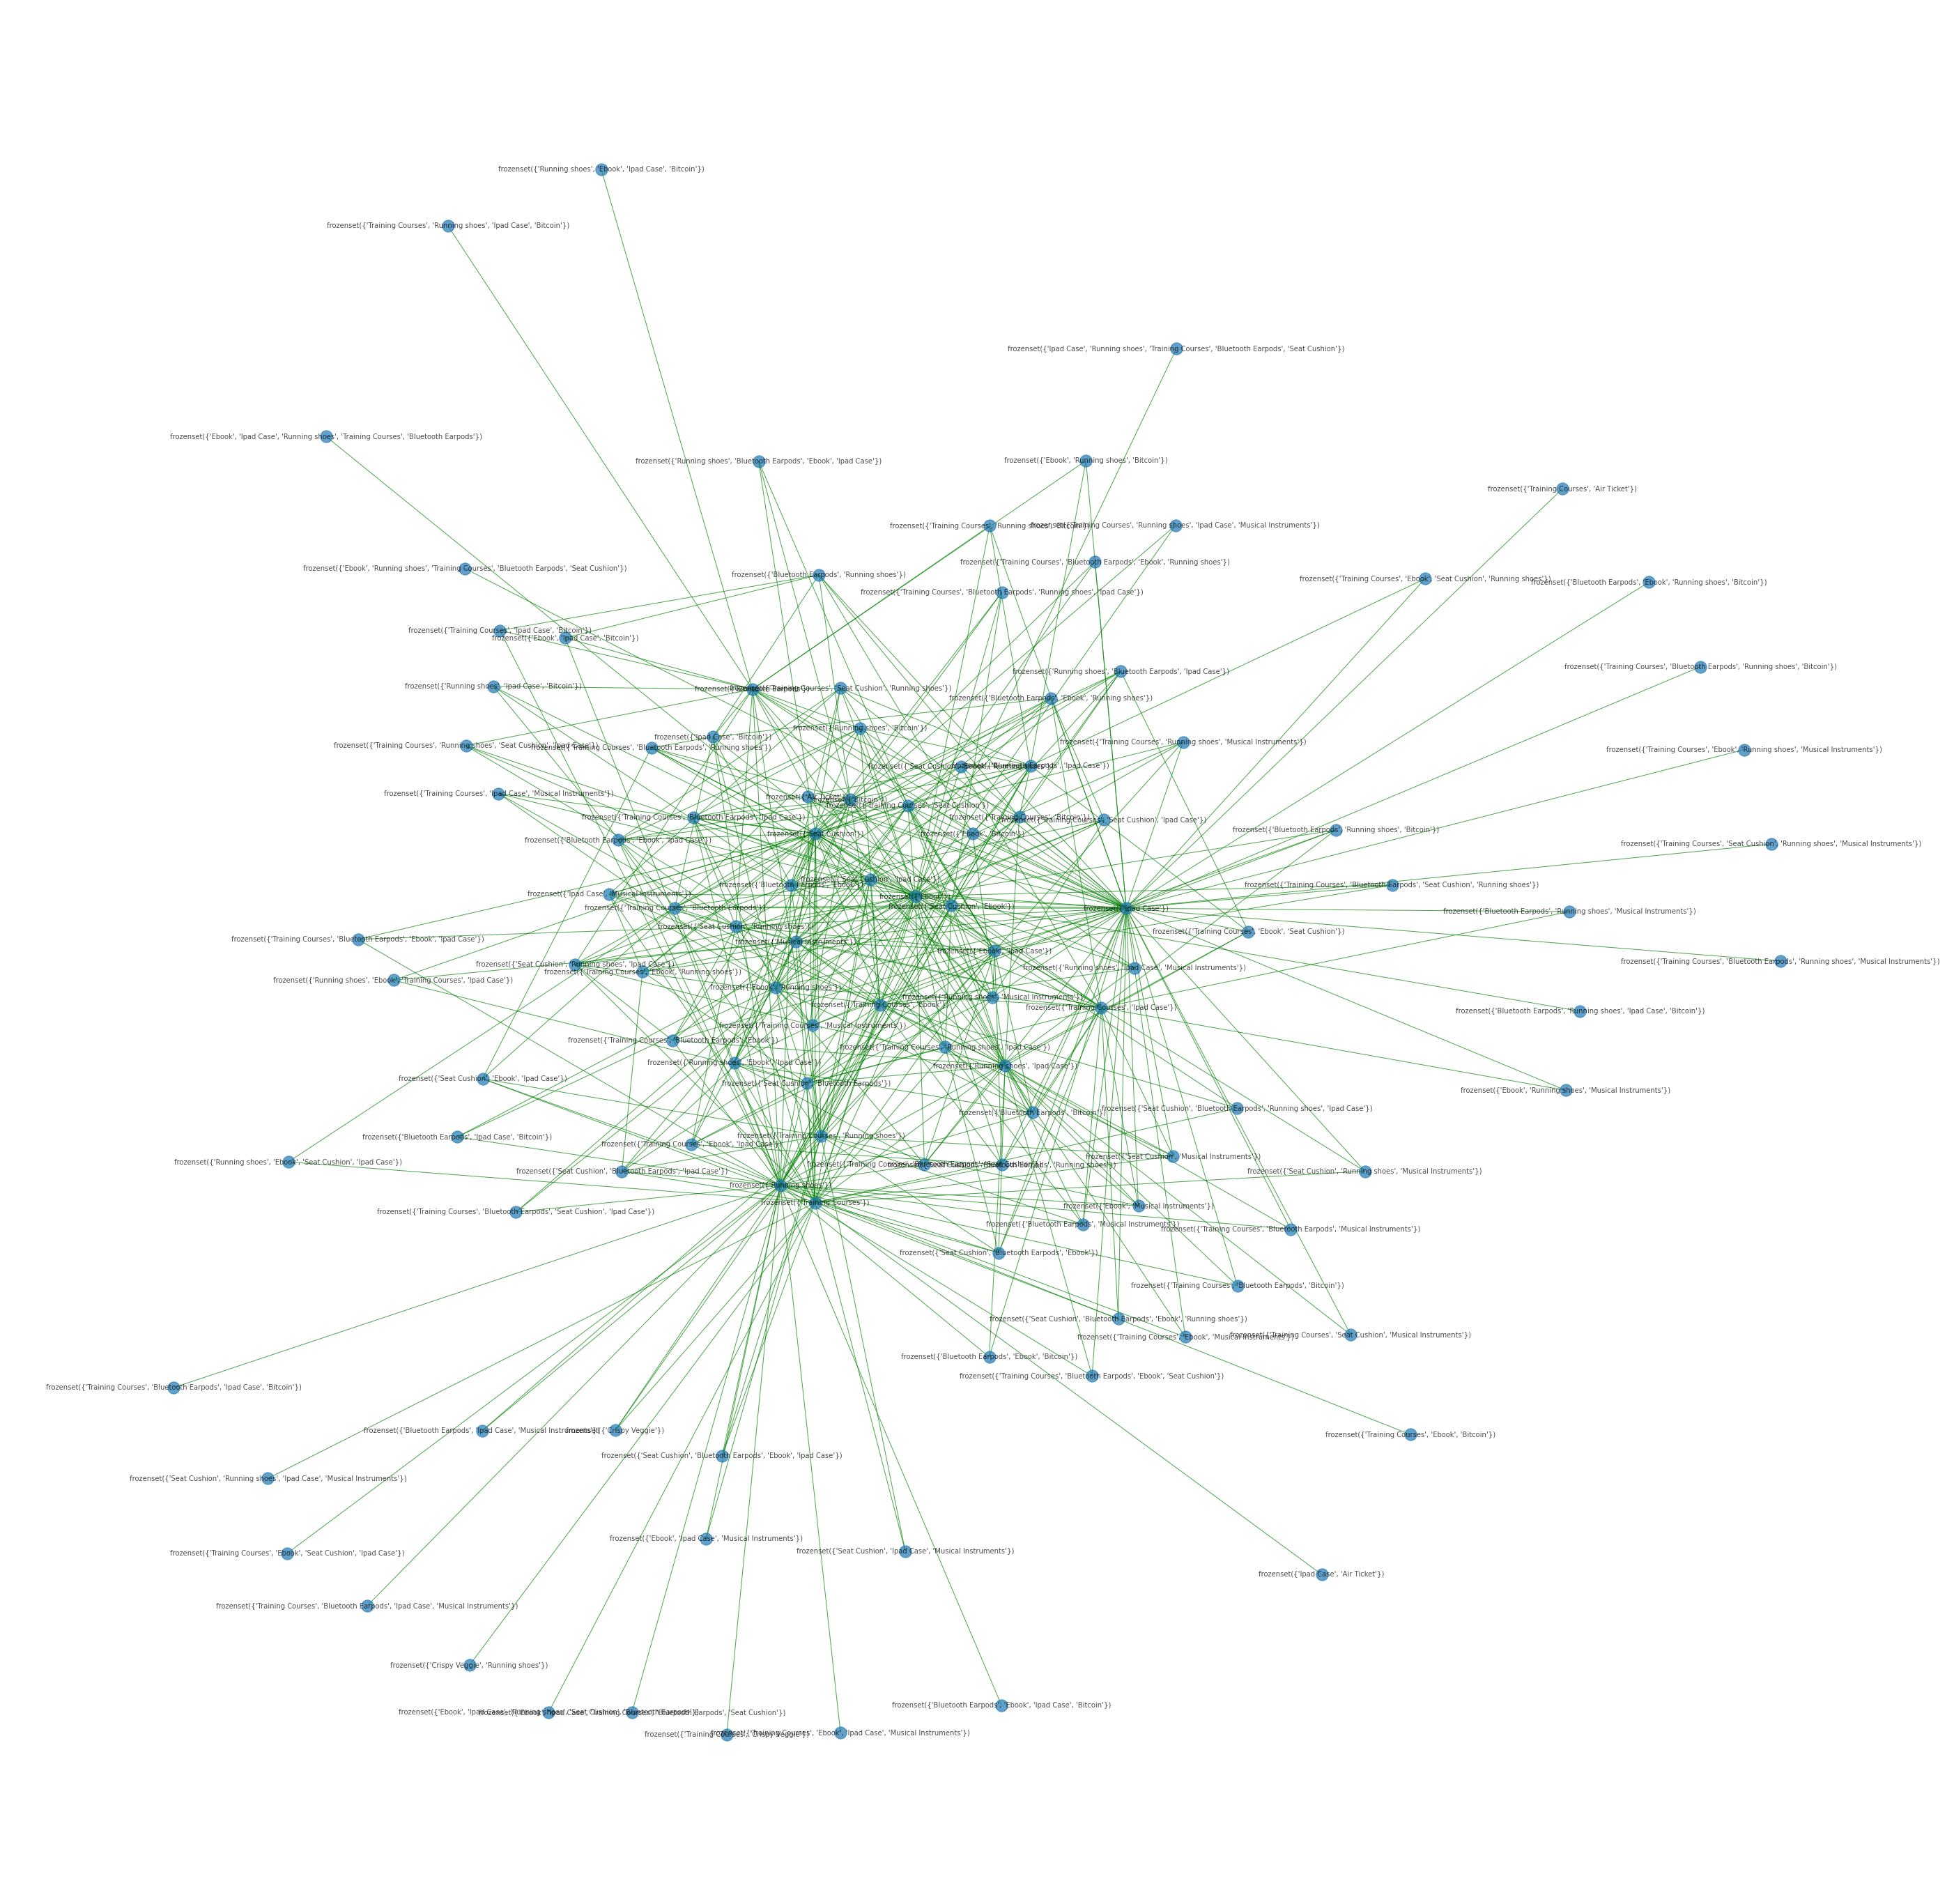

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,alpha = 0.7,node_size = 300,font_size=10,edge_color='g')
plt.show()

In [45]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [47]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [48]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [49]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

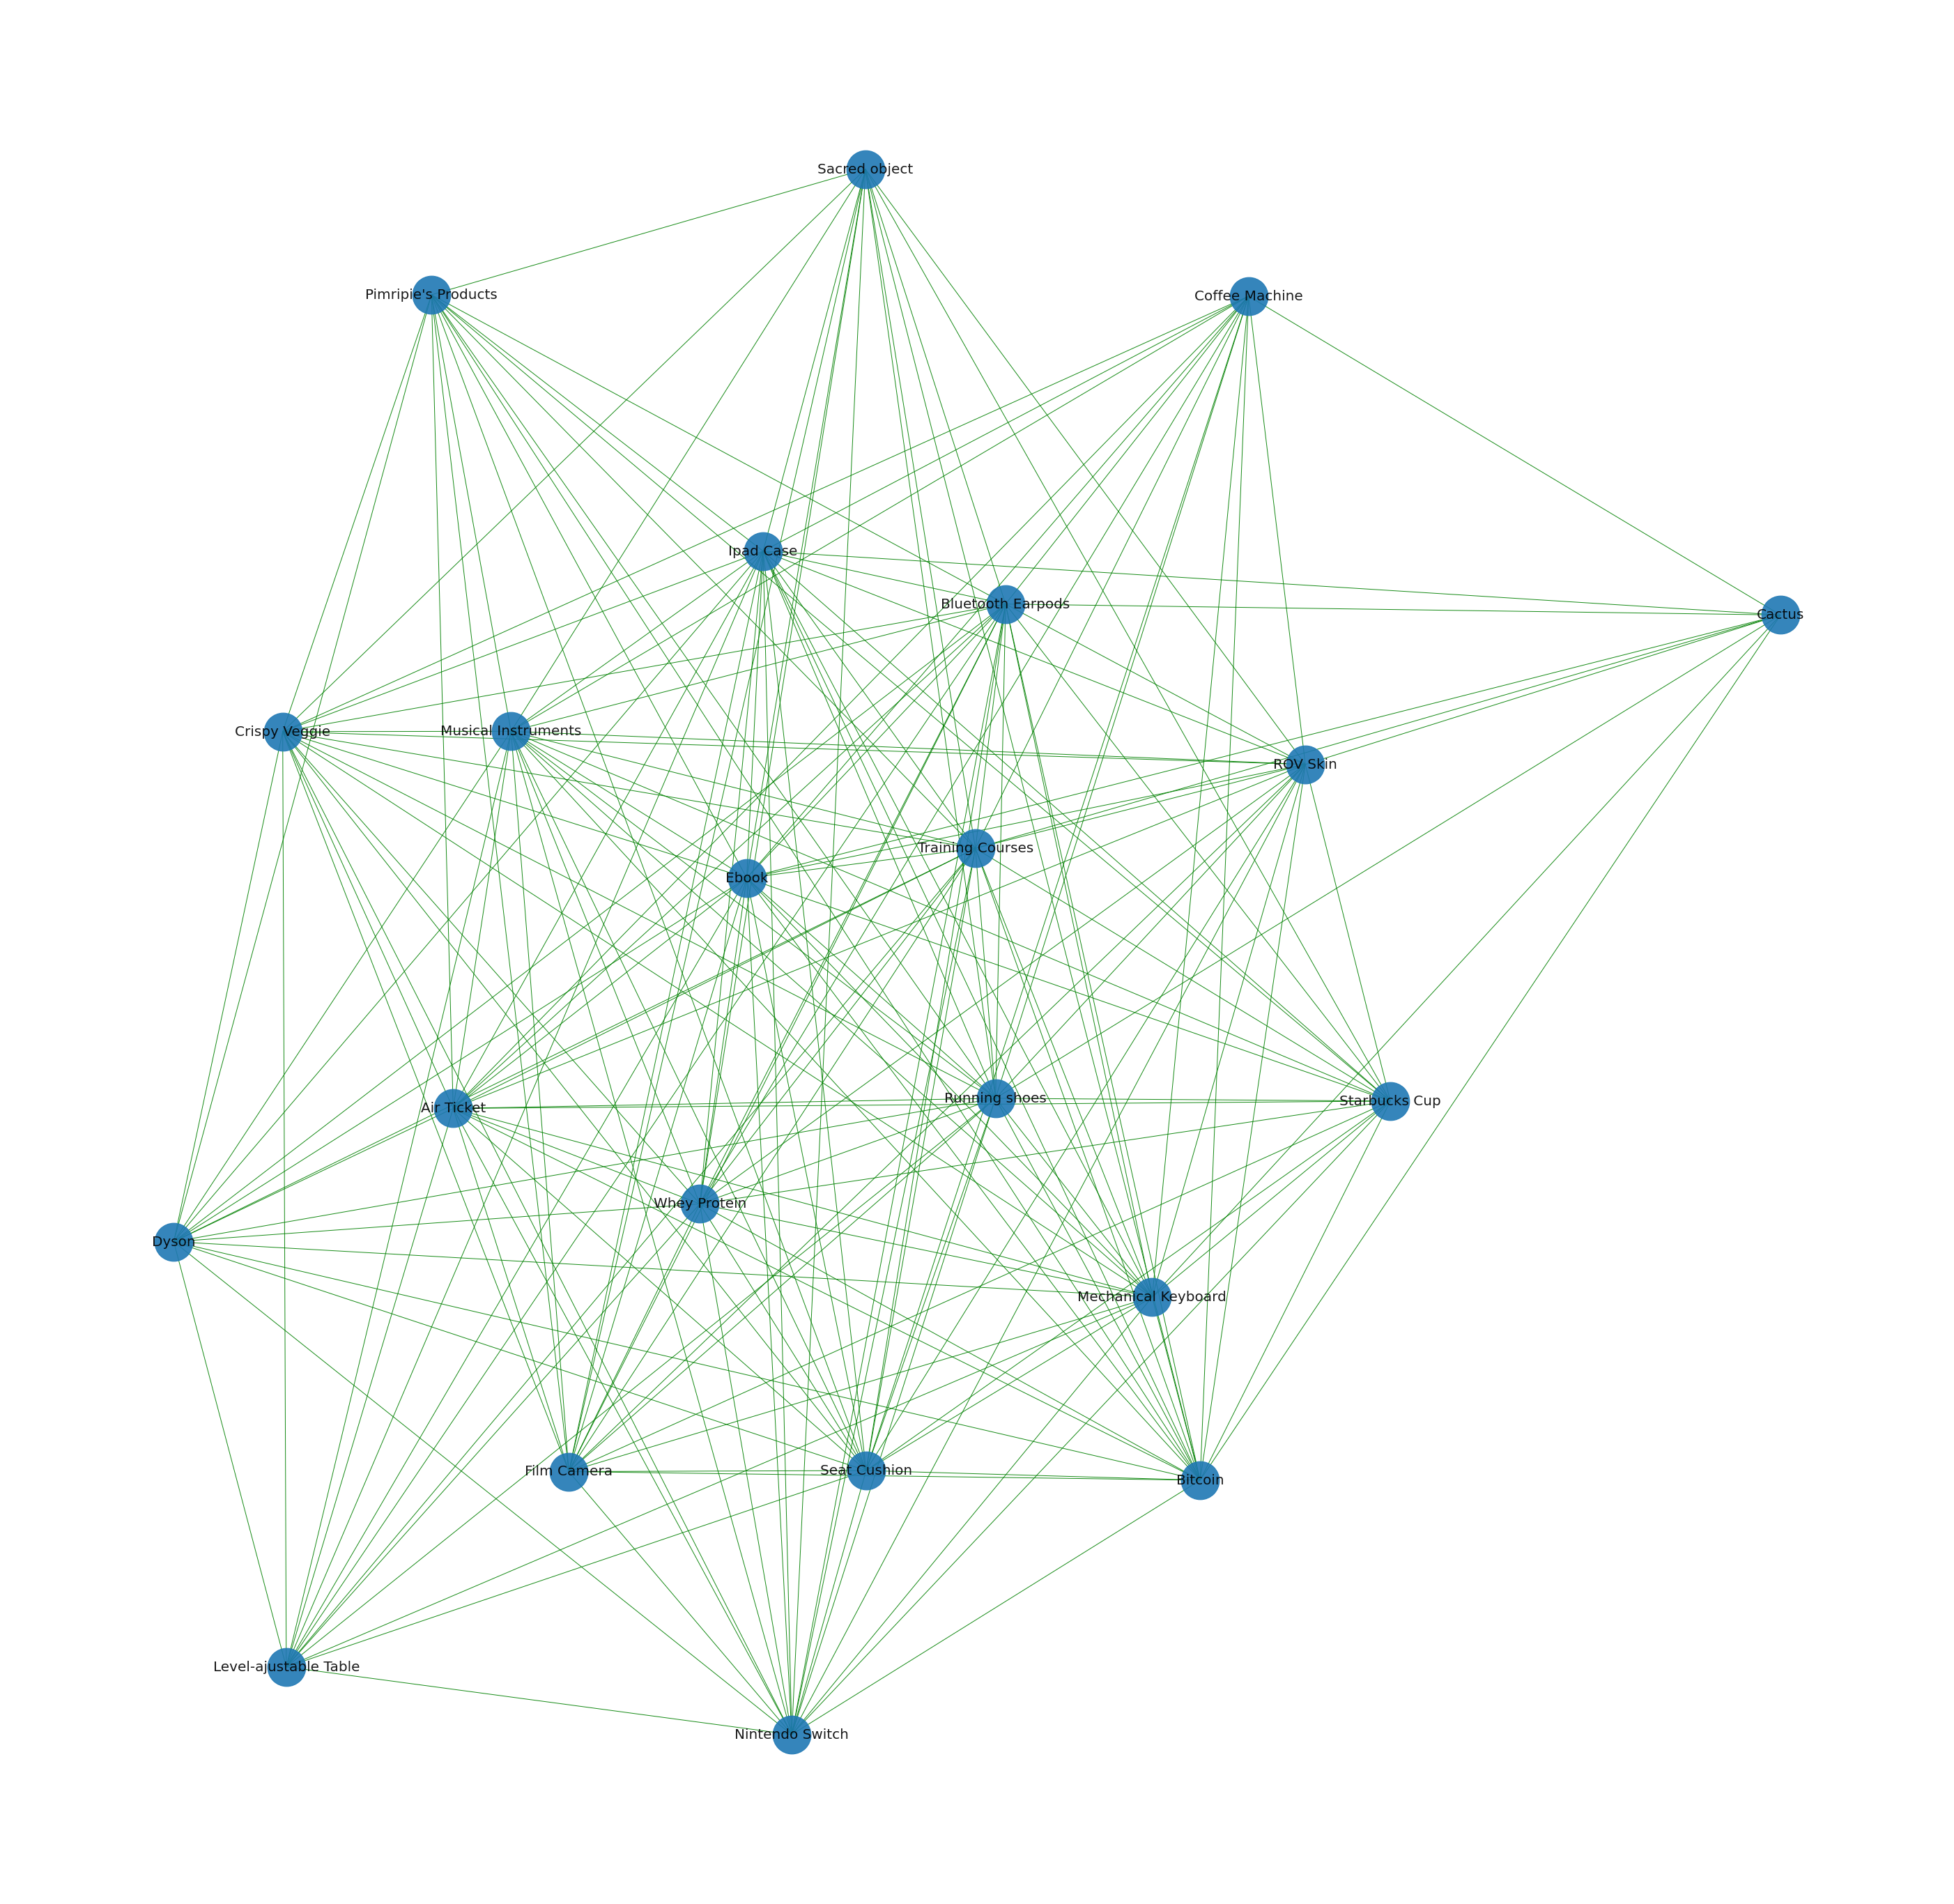

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,alpha = 0.9,node_size = 3000,font_size=20,edge_color='g')
plt.show()

In [106]:
df2 = df.T

In [107]:
df2.head()

0   1   2   3   4   5   6   ...  22  23  24  25  26  27  28
Running shoes      1   1   1   1   1   1   1  ...   1   1   1   1   1   1   1
Crispy Veggie      1   0   0   0   1   0   1  ...   0   0   0   1   0   0   1
Training Courses   1   1   1   1   1   0   1  ...   1   1   1   1   1   1   1
Nintendo Switch    0   1   0   0   0   0   0  ...   0   0   0   1   0   1   0
Bitcoin            0   1   1   1   0   1   0  ...   1   1   0   1   1   0   0

[5 rows x 29 columns]

In [108]:
df2['count'] = df2.sum(axis=1)

In [109]:
df2.head()

0  1  2  3  4  5  6  7  ...  22  23  24  25  26  27  28  count
Running shoes     1  1  1  1  1  1  1  1  ...   1   1   1   1   1   1   1     28
Crispy Veggie     1  0  0  0  1  0  1  0  ...   0   0   0   1   0   0   1     10
Training Courses  1  1  1  1  1  0  1  1  ...   1   1   1   1   1   1   1     27
Nintendo Switch   0  1  0  0  0  0  0  0  ...   0   0   0   1   0   1   0      7
Bitcoin           0  1  1  1  0  1  0  0  ...   1   1   0   1   1   0   0     13

[5 rows x 30 columns]

In [112]:
df_sorted = df2.sort_values('count',ascending = False)

<BarContainer object of 22 artists>

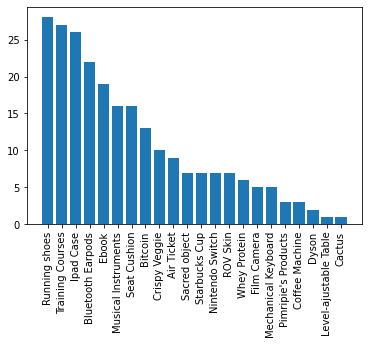

In [116]:
plt.xticks(rotation=90)
plt.bar(df_sorted.index,df_sorted['count'],align='center')

# **Summarize**

According to the product recomendation result, there are 2 interesting rules found during execution

1.   The customers who bought Bluetooth Earpods and Ebook have potential to buy Bitcoin. It may imply that the customers who bought Bluetooth Earpods and Ebook	tend to be familiar with the new technology or hi-tech lover which improve the probability that customers will buy Bitcoin. We may launch the campaign that you can accumulate points when you buy Ebook and then exchange to the small amount of Bitcoin.
2.   The customers who bought musical instrument have potential to buy Film camera. The two things can be identified as the mix of art and science. Therefore, we should try to manage the musical instrument and Film camera products near each other.